In [1]:
import pandas as pd

df = pd.read_csv("BathSoapHousehold.csv")
print('dimension:',df.shape)
df

dimension: (600, 46)


,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,2,3,10,2,4,5,5,4,1,...,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000
596,1167230,3,3,10,2,3,5,4,4,1,...,0.430693,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505
597,1167340,3,3,17,2,4,4,9,4,1,...,0.127148,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000
598,1167350,2,1,4,2,4,5,2,4,2,...,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027273,0.136364,0.000000


In [11]:
df.columns

Index(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
       'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
       'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14',
       'PropCat 15'],
      dtype='object')

In [13]:
df = df.drop(columns=['Member id'])


### Factor Analysis to find important variable

In [14]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

df_FA = pd.DataFrame(StandardScaler().fit_transform(df))

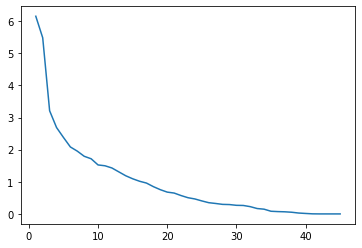

In [15]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

#Subset of the data, the 14 columns containing the survey answers
fa = FactorAnalyzer()
fa.fit(df_FA, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,df_FA.shape[1]+1),ev)

In [16]:
pd.DataFrame(ev.cumsum())

,0
0,6.151035
1,11.631458
2,14.840771
3,17.528880
4,19.908066
5,21.991241
6,23.944687
7,25.738043
8,27.454094
9,28.978161


I will use varimax rotation, which maximizes the sum of the variance of squared loadings while ensuring that the factors created are not correlated (orthogonality). Let’s see what factors are created.

In [17]:
fa = FactorAnalyzer(10, rotation='varimax')
fa.fit(df_FA)
loads = fa.loadings_
loadings_FA = pd.DataFrame(loads, columns=['F1', 'F2', 'F3','F4', 'F5',
                                                       'F6', 'F7','F8', 'F9', 'F10'],
                          index = df.columns.values.tolist())

loadings_FA

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
SEC,-0.301235,0.027055,-0.375000,-0.038086,0.081458,-0.053395,-0.259706,-0.155701,-0.056345,-0.150329
FEH,-0.112503,0.621096,-0.108862,0.105117,0.139913,0.045702,-0.102397,-0.093372,-0.106221,-0.048870
MT,-0.057297,0.664313,-0.122220,0.085219,0.128720,0.033070,-0.053395,-0.098535,-0.068797,-0.005484
SEX,0.018713,0.926816,-0.049782,0.077411,0.110089,-0.001854,-0.001659,0.029604,0.003777,0.020758
AGE,0.035946,0.111989,0.059112,0.021212,0.161804,-0.036764,0.026442,0.014745,0.019796,0.055339
EDU,0.228120,0.677172,0.183094,0.110665,-0.064710,0.037976,0.148887,0.137857,0.004300,0.116695
HS,-0.032082,0.632880,-0.141064,0.083096,0.402261,-0.000548,-0.072269,0.017213,-0.019716,0.000727
CHILD,-0.050075,-0.540829,0.075477,-0.110551,-0.045028,-0.038158,0.066958,0.036702,0.100339,0.037974
CS,-0.035739,0.663761,-0.072502,0.015260,0.050310,-0.002998,-0.016333,-0.053590,0.042198,0.030736
Affluence Index,0.249049,0.562876,0.222409,0.184803,0.045421,0.031898,0.152334,0.098641,0.103082,0.115775


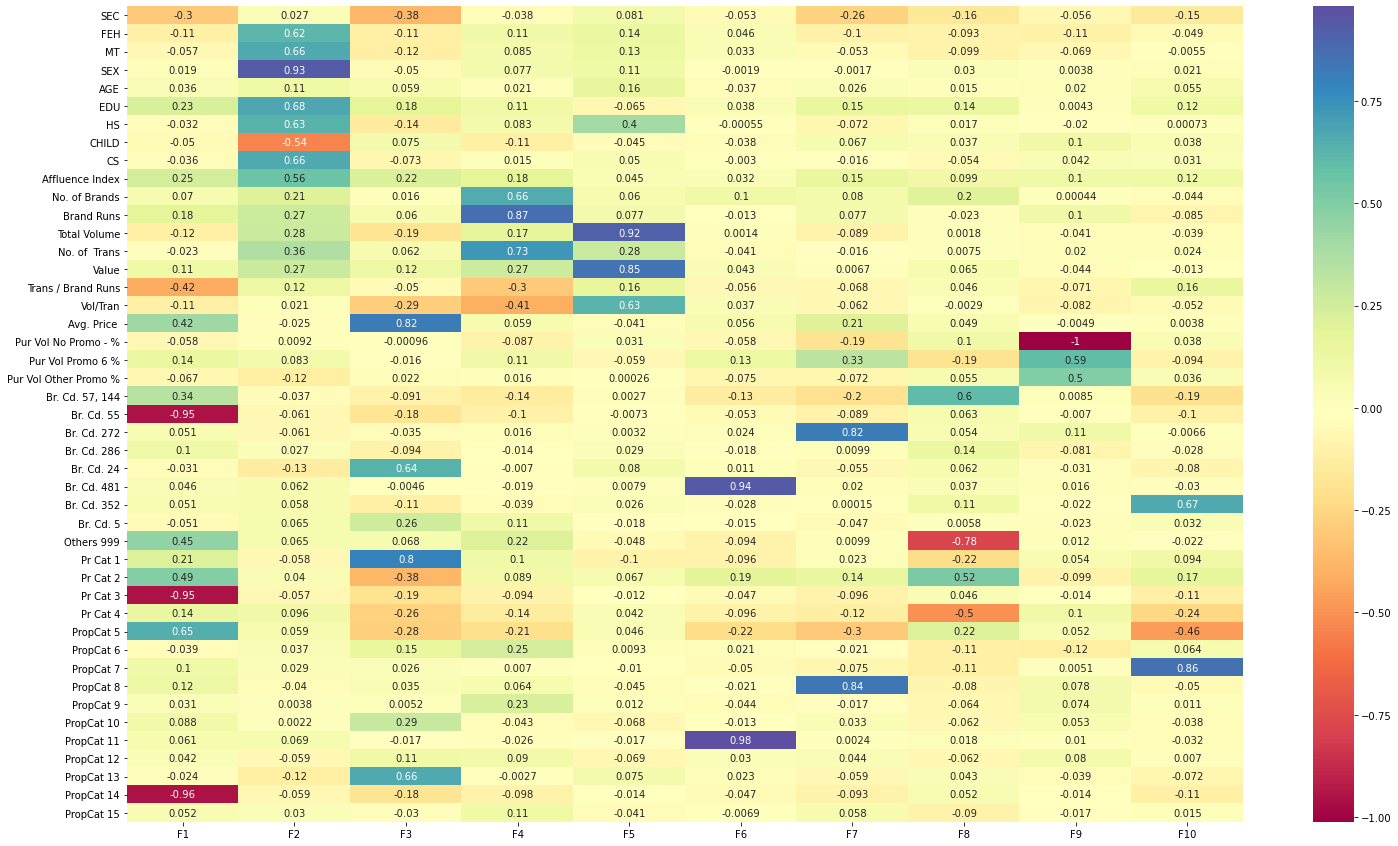

In [18]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = pyplot.subplots(figsize=(25,15))

ax = sns.heatmap(loadings_FA, annot=True, cmap='Spectral')
plt.show()

### Random Forest Feature Importance

In [19]:
df[df.AGE <3] = 0
df[df.AGE >=3] = 1

0      1
1      0
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: AGE, Length: 600, dtype: int64

In [36]:
y = df.AGE
X = df.drop(columns=['AGE'])

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)


In [38]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
from sklearn.metrics import accuracy_score


In [39]:
y_pred = rf.predict(X_test)
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [41]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": rf.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df


,feature,importance
36,PropCat 8,0.05
33,PropCat 5,0.05
7,CS,0.04
29,Pr Cat 1,0.04
19,Pur Vol Other Promo %,0.04
9,No. of Brands,0.04
8,Affluence Index,0.04
24,Br. Cd. 24,0.04
6,CHILD,0.03
42,PropCat 14,0.03


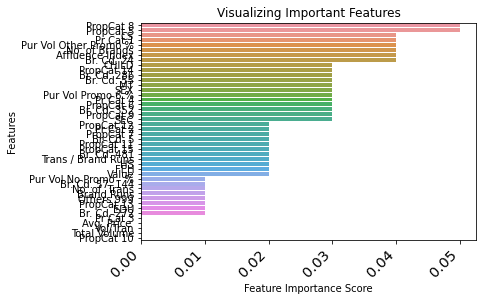

In [44]:
# visualize important featuers

# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Creating a bar plot
sns.barplot(x=feature_importances_df.importance, y=feature_importances_df.feature)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()